In [1]:
import pickle
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from nltk.corpus import stopwords
from nltk.stem import porter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.dummy import DummyClassifier
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score
import itertools


import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn')

/Users/NickThomas/Desktop/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
true_df = pickle.load(open("pickle_files/true_df.pkl", "rb" ))

In [3]:
corpus = pickle.load(open("pickle_files/corpus.pkl", "rb" ))

In [4]:
verbs_adverbs = pickle.load(open("pickle_files/verbs_adverbs.pkl", "rb" ))

In [5]:
simple_text = pickle.load(open("pickle_files/simple_text.pkl", "rb" ))

In [6]:
not_happening = pickle.load(open("pickle_files/not_happening.pkl", "rb" ))

In [7]:
how_can_this_happen = pickle.load(open("pickle_files/how_can_this_happen.pkl", "rb" ))

In [8]:
final_round = pickle.load(open("pickle_files/final_round.pkl", "rb" ))

In [2]:
final_round_clean = pickle.load(open("pickle_files/final_round_clean.pkl", "rb" ))

In [3]:
def count_letters(words):
    length = []
    for x in words:
        length.append(len(x))
    return sum(length)

In [4]:
count_letters(final_round_clean)

5495304

In [5]:
tfidf = TfidfVectorizer(ngram_range=(1, 4),  
                                   stop_words='english', 
                                   #token_pattern="\\b[a-z][a-z]+\\b",
                                   lowercase=True,
                                   max_df = 0.6)
cor_tfidf = tfidf.fit_transform(final_round_clean)

In [6]:
with open('cor_tfidf.pkl', 'wb') as picklefile:
        pickle.dump(cor_tfidf, picklefile)

In [7]:
tfidf = pickle.load(open("pickle_files/tfidf.pkl", "rb" ))
cor_tfidf = pickle.load(open("pickle_files/cor_tfidf.pkl", "rb" ))

In [7]:
with open('tfidf.pkl', 'wb') as picklefile:
        pickle.dump(tfidf, picklefile)

In [8]:
lsa = TruncatedSVD(140, algorithm = 'arpack')
corpus_lsa = lsa.fit_transform(cor_tfidf)
corpus_lsa = Normalizer(copy=False).fit_transform(corpus_lsa)

In [8]:
lsa = pickle.load(open("pickle_files/lsa.pkl", "rb" ))
corpus_lsa = pickle.load(open("pickle_files/corpus_lsa.pkl", "rb" ))

In [9]:
with open('lsa.pkl', 'wb') as picklefile:
        pickle.dump(lsa, picklefile)

In [10]:
with open('corpus_lsa.pkl', 'wb') as picklefile:
        pickle.dump(corpus_lsa, picklefile)

In [11]:
sum(lsa.explained_variance_ratio_)

0.09599557958115748

In [12]:
terms = tfidf.get_feature_names()

In [15]:
for i, comp in enumerate(lsa.components_):
    Terms_in_Comp = zip(terms,comp)
    sorted_Terms = sorted(Terms_in_Comp, key = lambda x: x[1], reverse=True) [:10]
    print("Topic %d:" %i)
    for term in sorted_Terms:
        print(term[0])
    print(" ")

Topic 0:
political
like
north
apolitical
says
like like
solid
context
provide
required
 
Topic 1:
tech
lifestyle
watch
military
clips newsroom
delayed 20
drones video
drones video military
drones video military tech
executive foreign tv
 
Topic 2:
free
free survive
survive
script
add
initial
daily
human
national
united
 
Topic 3:
north
korean
nuclear
north korean
white
south
told
national
russian
united
 
Topic 4:
north
korean
north korean
nuclear
south
south korean
yong
north said
singapore
pompeo
 
Topic 5:
override
10 10
10
10 10 10
republican
adspl
adspl override
adspl override netid
adspl override netid try
adtech_call_type
 
Topic 6:
10 10
override
10
10 10 10
adspl
adspl override
adspl override netid
adspl override netid try
adtech_call_type
adtech_call_type switch
 
Topic 7:
nuclear
syrian
global
russian
iranian
united
military
european
international
global global
 
Topic 8:
holistic
nuclear
available
plus
published
probably
medicinal
toxic
nutrition
researcher
 
Topic 9:
secon

Topic 73:
general
pardon
black
nuclear
18
constitutional
pardoning
arresting
guilty
supreme
 
Topic 74:
rural
sexual
senate
black
economic
tweeted
usa
north
bipartisan
shooting
 
Topic 75:
black
planned
religious
torshin
1pm 10am
armani
armani live
armani live 1pm
armani live 1pm 10am
follow weekly
 
Topic 76:
south
hurricane
military
post hurricane
conservative
cooper
korean
withheld
real
south korean
 
Topic 77:
torshin
black
sexual
general
spanish
hurricane
chinese
post hurricane
yahoo
30
 
Topic 78:
torshin
spanish
planned
yahoo
korean
1pm 10am
armani
armani live
armani live 1pm
armani live 1pm 10am
 
Topic 79:
palestinian
follow
born
foreign
foreign born
look
1pm 10am
armani
armani live
armani live 1pm
 
Topic 80:
black
born
foreign
foreign born
hurricane
post hurricane
legal
cooper
shooting
yougov
 
Topic 81:
pardon
pardoning
sexual
rural
ms 13
ms
nuclear
million
conservative
told
 
Topic 82:
29
bad
apologize
planned
bad looks
better forgive
better forgive bad
forgive bad
known b

In [16]:
import os

os.system('say "Your move.....Commander"')

0

In [44]:
SSEs = []
Sil_coefs = []
for k in range(100, 300):
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(corpus_lsa)
    labels = km.labels_
    Sil_coefs.append(silhouette_score(corpus_lsa, labels, metric='euclidean'))
    SSEs.append(km.inertia_) 

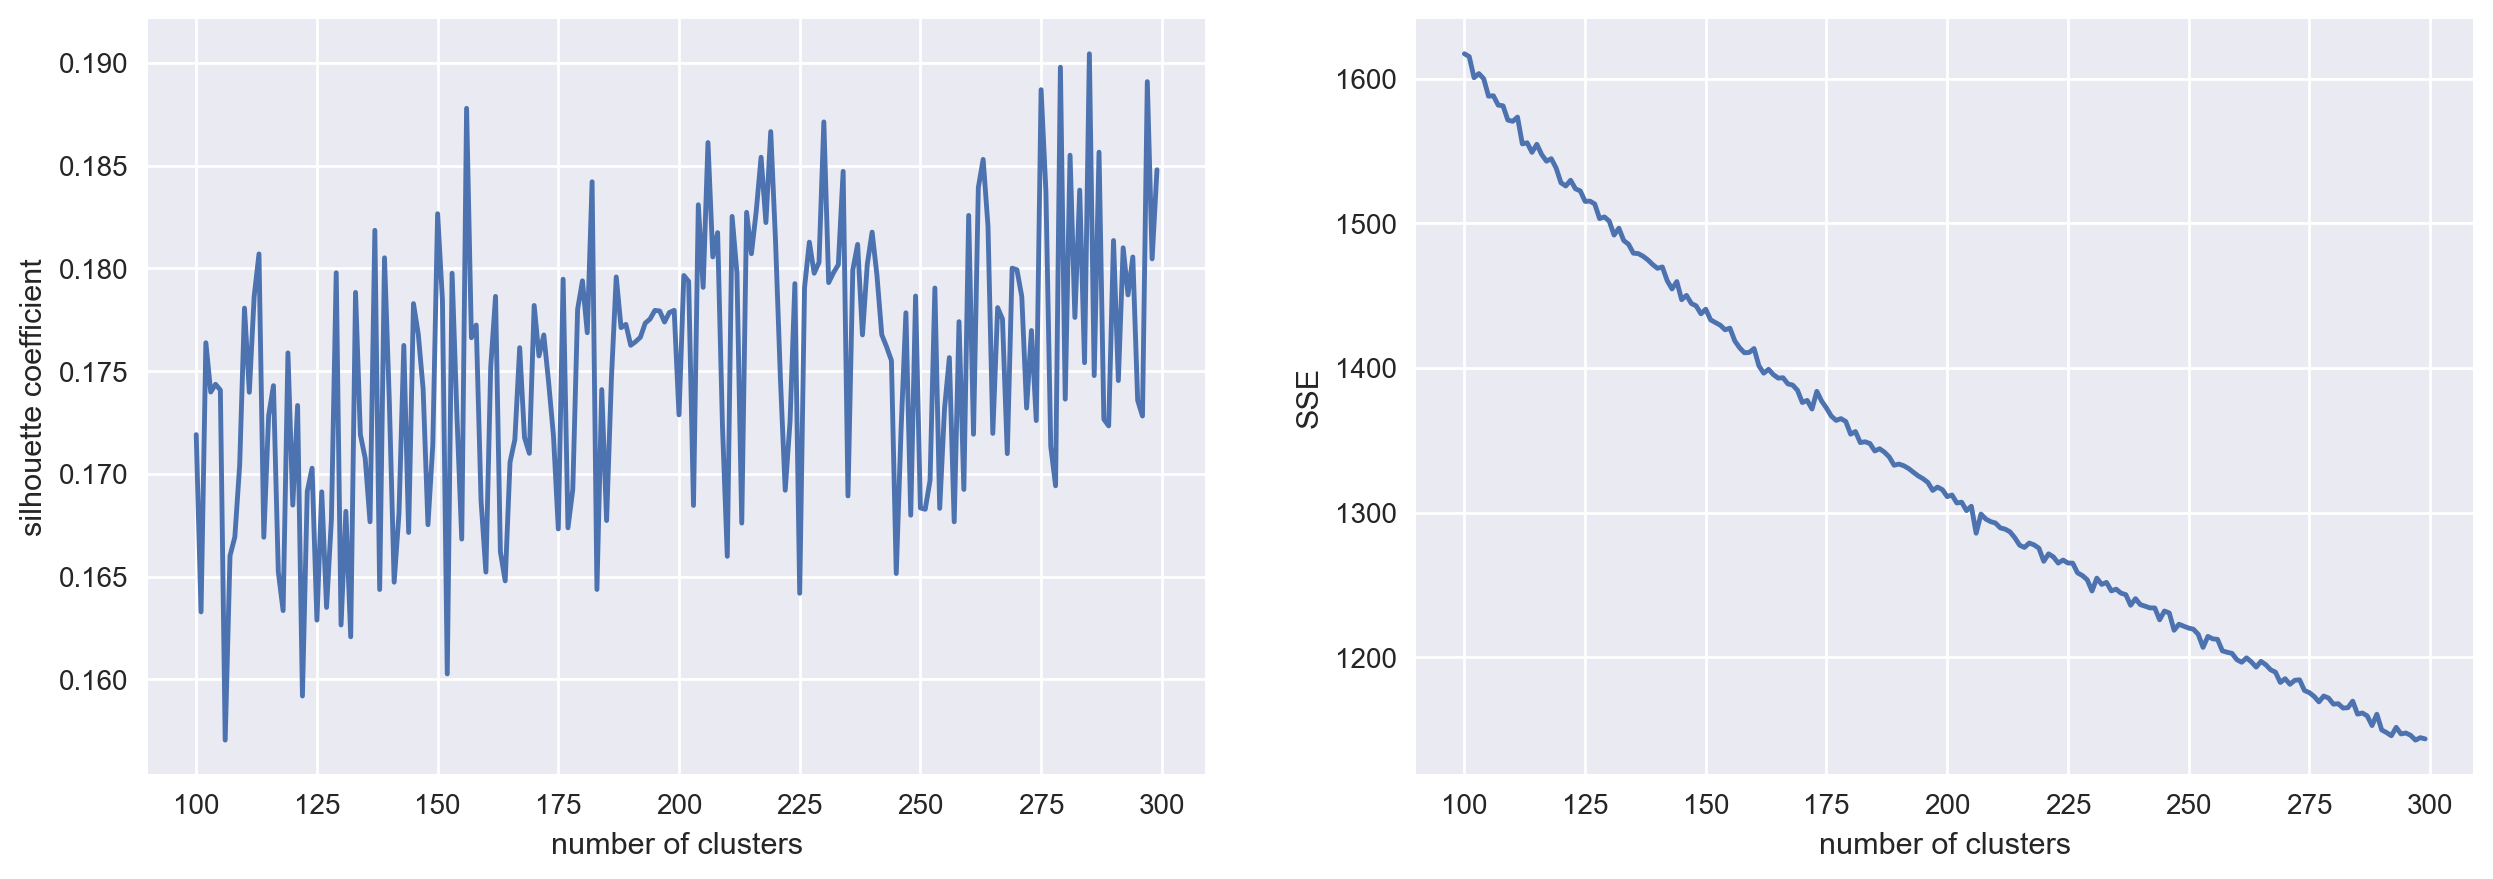

In [45]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5), sharex=True, dpi=200)
k_clusters = range(100,300)
ax1.plot(k_clusters, Sil_coefs)
ax1.set_xlabel('number of clusters')
ax1.set_ylabel('silhouette coefficient')

# plot here on ax2
ax2.plot(k_clusters, SSEs)
ax2.set_xlabel('number of clusters')
ax2.set_ylabel('SSE');

In [72]:
import os

os.system('say "Job\'s done"')

0

In [3]:
km = KMeans(n_clusters=300)
clusts = km.fit_predict(corpus_lsa)

NameError: name 'corpus_lsa' is not defined

In [70]:
with open('km.pkl', 'wb') as picklefile:
        pickle.dump(km, picklefile)

In [47]:
len(clusts)

4092

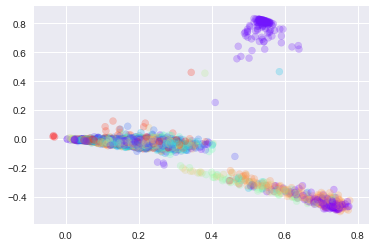

In [88]:
plt.scatter(corpus_lsa[:, 0], corpus_lsa[:, 1], c=clusts, cmap=plt.cm.rainbow, alpha=0.25)


In [27]:
from sklearn.manifold import TSNE
#Fits t-SNE for visualization
tsne = TSNE(n_components=2)
X_transformed = tsne.fit_transform(corpus_lsa)

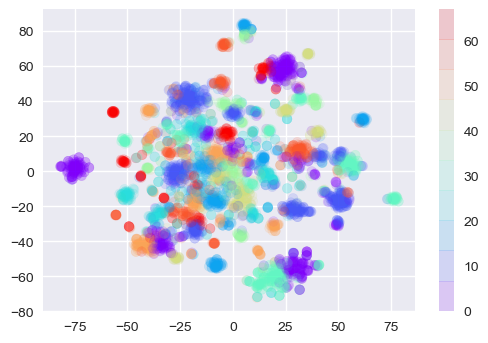

In [28]:
#Graphs t-SNE
plt.figure(dpi=100)

cmap = plt.cm.get_cmap('rainbow', 10)
plt.scatter(X_transformed[:, 0], X_transformed[:,1], c=clusts, cmap=cmap, alpha = 0.15)
#plt.xlim(-20,30)
#plt.ylim(-30,-10)
plt.colorbar()
plt.clim()

In [48]:
true_df['clusters'] = clusts

In [41]:
with open('true_df_clusts.pkl', 'wb') as picklefile:
        pickle.dump(true_df, picklefile)

In [11]:
true_df = pickle.load(open("pickle_files/true_df_clusts.pkl", "rb" ))

In [32]:
true_df.head()

,body,num_source,source,title,clusters
0,The following statements were posted to the ve...,2.0,Reuters,"Trump on Twitter (June 6): Mitch McConnell, Jo...",53
1,"TEL AVIV (Reuters) - Donald Trump’s attorney, ...",2.0,Reuters,Giuliani says Mueller's investigators trying t...,80
2,WASHINGTON (Reuters) - U.S. House of Represent...,2.0,Reuters,House Speaker doubtful of NAFTA passage in cur...,108
3,BRUSSELS (Reuters) - U.S. Defense Secretary Ji...,2.0,Reuters,"In Europe, Mattis is in familiar spot: calming...",79
4,"WASHINGTON/MORRISTOWN, N.J. (Reuters) - A lawy...",2.0,Reuters,Lawyer to ex-Trump campaign aide Manafort taps...,9


In [20]:
true_df.source.value_counts()

Info wars          515
Reuters            495
Mother Jones       455
Activist Post      420
National Review    418
Huffington Post    412
Alabama Today      385
Daily Beast        347
Breitbart          307
Global Research    190
Fox News           121
Associate Press     27
Name: source, dtype: int64

In [49]:
true_df.clusters.value_counts()

286    108
2      104
6       76
112     62
64      48
271     45
137     42
38      40
103     38
280     37
175     34
19      34
232     34
146     33
111     32
65      31
168     29
189     29
156     28
147     28
23      28
148     27
24      26
10      26
241     26
116     25
226     25
166     25
255     24
245     24
      ... 
217      3
273      3
291      3
297      3
9        3
270      3
200      3
77       3
212      3
43       3
17       3
120      3
203      2
265      2
0        2
199      2
191      2
187      2
50       2
107      2
296      2
282      2
274      2
242      2
240      2
238      2
102      2
224      2
222      2
29       1
Name: clusters, Length: 300, dtype: int64

In [131]:
for x in range(119):
    largest = true_df['clusters'] == x
    clust_x_df = true_df[largest]
    print("Cluster {}\n".format(x), clust_x_df.source.value_counts())

Cluster 0
 Fox News    117
Name: source, dtype: int64
Cluster 1
 Info wars          14
Mother Jones        9
Huffington Post     4
Daily Beast         4
National Review     3
Breitbart           3
Reuters             1
Activist Post       1
Name: source, dtype: int64
Cluster 2
 Reuters            25
Daily Beast        10
Breitbart           6
Mother Jones        4
Info wars           3
Huffington Post     2
National Review     1
Activist Post       1
Name: source, dtype: int64
Cluster 3
 Alabama Today    137
Name: source, dtype: int64
Cluster 4
 Activist Post    47
Name: source, dtype: int64
Cluster 5
 National Review    10
Breitbart           7
Huffington Post     4
Info wars           3
Associate Press     2
Mother Jones        2
Daily Beast         1
Reuters             1
Name: source, dtype: int64
Cluster 6
 Daily Beast    88
Name: source, dtype: int64
Cluster 7
 Global Research    10
Huffington Post     2
Daily Beast         2
Reuters             2
Breitbart           1
Activist P

 Alabama Today      7
Huffington Post    1
Mother Jones       1
Reuters            1
Daily Beast        1
Name: source, dtype: int64
Cluster 107
 Reuters    16
Name: source, dtype: int64
Cluster 108
 Breitbart          7
Huffington Post    5
Info wars          4
Reuters            1
Name: source, dtype: int64
Cluster 109
 National Review    5
Huffington Post    3
Mother Jones       1
Name: source, dtype: int64
Cluster 110
 Reuters            22
Huffington Post     3
Info wars           2
Daily Beast         1
Mother Jones        1
Name: source, dtype: int64
Cluster 111
 Info wars          7
Mother Jones       7
Huffington Post    5
Reuters            5
National Review    4
Associate Press    2
Name: source, dtype: int64
Cluster 112
 Reuters            17
Global Research    11
National Review     6
Daily Beast         4
Mother Jones        4
Info wars           4
Huffington Post     3
Breitbart           2
Fox News            1
Name: source, dtype: int64
Cluster 113
 Activist Post    32

In [6]:
reference = true_df[['source','clusters']].pivot_table(index='clusters', columns='source', aggfunc=len)

In [13]:
X = corpus_lsa
y = true_df.source
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#X_train = X_train.reshape(-1,1)
#X_test = X_test.reshape(-1,1)

NameError: name 'true_df' is not defined

In [ ]:
with open('X.pkl', 'wb') as picklefile:
        pickle.dump(X, picklefile)
with open('y.pkl', 'wb') as picklefile:
        pickle.dump(y, picklefile)

In [22]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc

models = [RandomForestClassifier(n_estimators=100, n_jobs=-1, max_depth=10), DecisionTreeClassifier(max_depth=None), 
          BaggingClassifier(base_estimator=DecisionTreeClassifier(),n_estimators=100, n_jobs=-1),
          SVC(probability=True), LogisticRegression(C=0.1), SGDClassifier(loss='log', random_state=42, alpha=0.01)]
model_names = ["Random Forest", "Decision Tree",'Bagging Classifier','SVC','Logistic','SGD-Log']

In [ ]:
dumb = DummyClassifier(strategy = "stratified", random_state=0)
dumb.fit(X_train, y_train)
print(dumb.score(X_test, y_test))
print(dumb.score(X_train, y_train))

In [ ]:
lm1 = LogisticRegression(C=1000)
lm1.fit(X_train, y_train)
print(lm1.score(X_test, y_test))
print(lm1.score(X_train, y_train))

In [69]:
rf2 = pickle.load(open("pickle_files/rf2.pkl", "rb" ))

In [11]:
dt = pickle.load(open("pickle_files/dt.pkl", "rb" ))

In [ ]:
bc = pickle.load(open("pickle_files/bc.pkl", "rb" ))

In [26]:
model = RandomForestClassifier()
parameters = {'n_estimators': [5,10,15,20,25], 'max_depth': [5,10,15,20,25], 'min_samples_split': [2, 4, 6, 8], 'bootstrap': [True, False]}
grid = GridSearchCV(model,parameters, cv=5, scoring='neg_mean_absolute_error', n_jobs=1)
grid.fit(X_train, y_train)

ValueError: could not convert string to float: 'Associate Press'

In [25]:
from sklearn.model_selection import RandomizedSearchCV
parameters = {'n_estimators': [5,10,15,20,25], 'max_depth': [5,10,15,20,25], 'min_samples_split': [2, 4, 6, 8], 'bootstrap': [True, False]}
model = RandomForestClassifier()
randcv = RandomizedSearchCV(model, parameters, scoring='neg_mean_absolute_error', n_jobs=-1)
randcv.fit(X_train, y_train)

JoblibValueError: JoblibValueError
___________________________________________________________________________
Multiprocessing exception:
...........................................................................
/Users/NickThomas/Desktop/anaconda/lib/python3.6/runpy.py in _run_module_as_main(mod_name='ipykernel_launcher', alter_argv=1)
    188         sys.exit(msg)
    189     main_globals = sys.modules["__main__"].__dict__
    190     if alter_argv:
    191         sys.argv[0] = mod_spec.origin
    192     return _run_code(code, main_globals, None,
--> 193                      "__main__", mod_spec)
        mod_spec = ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.6/site-packages/ipykernel_launcher.py')
    194 
    195 def run_module(mod_name, init_globals=None,
    196                run_name=None, alter_sys=False):
    197     """Execute a module's code without importing it

...........................................................................
/Users/NickThomas/Desktop/anaconda/lib/python3.6/runpy.py in _run_code(code=<code object <module> at 0x10808e1e0, file "/Use...3.6/site-packages/ipykernel_launcher.py", line 5>, run_globals={'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': '/Users/NickThomas/Desktop/anaconda/lib/python3.6...ges/__pycache__/ipykernel_launcher.cpython-36.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': '/Users/NickThomas/Desktop/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.6/site-packages/ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from '/Users/NickT.../python3.6/site-packages/ipykernel/kernelapp.py'>, ...}, init_globals=None, mod_name='__main__', mod_spec=ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.6/site-packages/ipykernel_launcher.py'), pkg_name='', script_name=None)
     80                        __cached__ = cached,
     81                        __doc__ = None,
     82                        __loader__ = loader,
     83                        __package__ = pkg_name,
     84                        __spec__ = mod_spec)
---> 85     exec(code, run_globals)
        code = <code object <module> at 0x10808e1e0, file "/Use...3.6/site-packages/ipykernel_launcher.py", line 5>
        run_globals = {'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': '/Users/NickThomas/Desktop/anaconda/lib/python3.6...ges/__pycache__/ipykernel_launcher.cpython-36.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': '/Users/NickThomas/Desktop/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.6/site-packages/ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from '/Users/NickT.../python3.6/site-packages/ipykernel/kernelapp.py'>, ...}
     86     return run_globals
     87 
     88 def _run_module_code(code, init_globals=None,
     89                     mod_name=None, mod_spec=None,

...........................................................................
/Users/NickThomas/Desktop/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py in <module>()
     11     # This is added back by InteractiveShellApp.init_path()
     12     if sys.path[0] == '':
     13         del sys.path[0]
     14 
     15     from ipykernel import kernelapp as app
---> 16     app.launch_new_instance()

...........................................................................
/Users/NickThomas/Desktop/anaconda/lib/python3.6/site-packages/traitlets/config/application.py in launch_instance(cls=<class 'ipykernel.kernelapp.IPKernelApp'>, argv=None, **kwargs={})
    653 
    654         If a global instance already exists, this reinitializes and starts it
    655         """
    656         app = cls.instance(**kwargs)
    657         app.initialize(argv)
--> 658         app.start()
        app.start = <bound method IPKernelApp.start of <ipykernel.kernelapp.IPKernelApp object>>
    659 
    660 #-----------------------------------------------------------------------------
    661 # utility functions, for convenience
    662 #-----------------------------------------------------------------------------

...........................................................................
/Users/NickThomas/Desktop/anaconda/lib/python3.6/site-packages/ipykernel/kernelapp.py in start(self=<ipykernel.kernelapp.IPKernelApp object>)
    481         if self.poller is not None:
    482             self.poller.start()
    483         self.kernel.start()
    484         self.io_loop = ioloop.IOLoop.current()
    485         try:
--> 486             self.io_loop.start()
        self.io_loop.start = <bound method BaseAsyncIOLoop.start of <tornado.platform.asyncio.AsyncIOMainLoop object>>
    487         except KeyboardInterrupt:
    488             pass
    489 
    490 launch_new_instance = IPKernelApp.launch_instance

...........................................................................
/Users/NickThomas/Desktop/anaconda/lib/python3.6/site-packages/tornado/platform/asyncio.py in start(self=<tornado.platform.asyncio.AsyncIOMainLoop object>)
    122         except (RuntimeError, AssertionError):
    123             old_loop = None
    124         try:
    125             self._setup_logging()
    126             asyncio.set_event_loop(self.asyncio_loop)
--> 127             self.asyncio_loop.run_forever()
        self.asyncio_loop.run_forever = <bound method BaseEventLoop.run_forever of <_Uni...EventLoop running=True closed=False debug=False>>
    128         finally:
    129             asyncio.set_event_loop(old_loop)
    130 
    131     def stop(self):

...........................................................................
/Users/NickThomas/Desktop/anaconda/lib/python3.6/asyncio/base_events.py in run_forever(self=<_UnixSelectorEventLoop running=True closed=False debug=False>)
    417             sys.set_asyncgen_hooks(firstiter=self._asyncgen_firstiter_hook,
    418                                    finalizer=self._asyncgen_finalizer_hook)
    419         try:
    420             events._set_running_loop(self)
    421             while True:
--> 422                 self._run_once()
        self._run_once = <bound method BaseEventLoop._run_once of <_UnixS...EventLoop running=True closed=False debug=False>>
    423                 if self._stopping:
    424                     break
    425         finally:
    426             self._stopping = False

...........................................................................
/Users/NickThomas/Desktop/anaconda/lib/python3.6/asyncio/base_events.py in _run_once(self=<_UnixSelectorEventLoop running=True closed=False debug=False>)
   1427                         logger.warning('Executing %s took %.3f seconds',
   1428                                        _format_handle(handle), dt)
   1429                 finally:
   1430                     self._current_handle = None
   1431             else:
-> 1432                 handle._run()
        handle._run = <bound method Handle._run of <Handle BaseAsyncIOLoop._handle_events(15, 1)>>
   1433         handle = None  # Needed to break cycles when an exception occurs.
   1434 
   1435     def _set_coroutine_wrapper(self, enabled):
   1436         try:

...........................................................................
/Users/NickThomas/Desktop/anaconda/lib/python3.6/asyncio/events.py in _run(self=<Handle BaseAsyncIOLoop._handle_events(15, 1)>)
    140             self._callback = None
    141             self._args = None
    142 
    143     def _run(self):
    144         try:
--> 145             self._callback(*self._args)
        self._callback = <bound method BaseAsyncIOLoop._handle_events of <tornado.platform.asyncio.AsyncIOMainLoop object>>
        self._args = (15, 1)
    146         except Exception as exc:
    147             cb = _format_callback_source(self._callback, self._args)
    148             msg = 'Exception in callback {}'.format(cb)
    149             context = {

...........................................................................
/Users/NickThomas/Desktop/anaconda/lib/python3.6/site-packages/tornado/platform/asyncio.py in _handle_events(self=<tornado.platform.asyncio.AsyncIOMainLoop object>, fd=15, events=1)
    112             self.writers.remove(fd)
    113         del self.handlers[fd]
    114 
    115     def _handle_events(self, fd, events):
    116         fileobj, handler_func = self.handlers[fd]
--> 117         handler_func(fileobj, events)
        handler_func = <function wrap.<locals>.null_wrapper>
        fileobj = <zmq.sugar.socket.Socket object>
        events = 1
    118 
    119     def start(self):
    120         try:
    121             old_loop = asyncio.get_event_loop()

...........................................................................
/Users/NickThomas/Desktop/anaconda/lib/python3.6/site-packages/tornado/stack_context.py in null_wrapper(*args=(<zmq.sugar.socket.Socket object>, 1), **kwargs={})
    271         # Fast path when there are no active contexts.
    272         def null_wrapper(*args, **kwargs):
    273             try:
    274                 current_state = _state.contexts
    275                 _state.contexts = cap_contexts[0]
--> 276                 return fn(*args, **kwargs)
        args = (<zmq.sugar.socket.Socket object>, 1)
        kwargs = {}
    277             finally:
    278                 _state.contexts = current_state
    279         null_wrapper._wrapped = True
    280         return null_wrapper

...........................................................................
/Users/NickThomas/Desktop/anaconda/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py in _handle_events(self=<zmq.eventloop.zmqstream.ZMQStream object>, fd=<zmq.sugar.socket.Socket object>, events=1)
    445             return
    446         zmq_events = self.socket.EVENTS
    447         try:
    448             # dispatch events:
    449             if zmq_events & zmq.POLLIN and self.receiving():
--> 450                 self._handle_recv()
        self._handle_recv = <bound method ZMQStream._handle_recv of <zmq.eventloop.zmqstream.ZMQStream object>>
    451                 if not self.socket:
    452                     return
    453             if zmq_events & zmq.POLLOUT and self.sending():
    454                 self._handle_send()

...........................................................................
/Users/NickThomas/Desktop/anaconda/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py in _handle_recv(self=<zmq.eventloop.zmqstream.ZMQStream object>)
    475             else:
    476                 raise
    477         else:
    478             if self._recv_callback:
    479                 callback = self._recv_callback
--> 480                 self._run_callback(callback, msg)
        self._run_callback = <bound method ZMQStream._run_callback of <zmq.eventloop.zmqstream.ZMQStream object>>
        callback = <function wrap.<locals>.null_wrapper>
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    481         
    482 
    483     def _handle_send(self):
    484         """Handle a send event."""

...........................................................................
/Users/NickThomas/Desktop/anaconda/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py in _run_callback(self=<zmq.eventloop.zmqstream.ZMQStream object>, callback=<function wrap.<locals>.null_wrapper>, *args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    427         close our socket."""
    428         try:
    429             # Use a NullContext to ensure that all StackContexts are run
    430             # inside our blanket exception handler rather than outside.
    431             with stack_context.NullContext():
--> 432                 callback(*args, **kwargs)
        callback = <function wrap.<locals>.null_wrapper>
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    433         except:
    434             gen_log.error("Uncaught exception in ZMQStream callback",
    435                           exc_info=True)
    436             # Re-raise the exception so that IOLoop.handle_callback_exception

...........................................................................
/Users/NickThomas/Desktop/anaconda/lib/python3.6/site-packages/tornado/stack_context.py in null_wrapper(*args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    271         # Fast path when there are no active contexts.
    272         def null_wrapper(*args, **kwargs):
    273             try:
    274                 current_state = _state.contexts
    275                 _state.contexts = cap_contexts[0]
--> 276                 return fn(*args, **kwargs)
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    277             finally:
    278                 _state.contexts = current_state
    279         null_wrapper._wrapped = True
    280         return null_wrapper

...........................................................................
/Users/NickThomas/Desktop/anaconda/lib/python3.6/site-packages/ipykernel/kernelbase.py in dispatcher(msg=[<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>])
    278         if self.control_stream:
    279             self.control_stream.on_recv(self.dispatch_control, copy=False)
    280 
    281         def make_dispatcher(stream):
    282             def dispatcher(msg):
--> 283                 return self.dispatch_shell(stream, msg)
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    284             return dispatcher
    285 
    286         for s in self.shell_streams:
    287             s.on_recv(make_dispatcher(s), copy=False)

...........................................................................
/Users/NickThomas/Desktop/anaconda/lib/python3.6/site-packages/ipykernel/kernelbase.py in dispatch_shell(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, msg={'buffers': [], 'content': {'allow_stdin': True, 'code': "from sklearn.model_selection import RandomizedSe...e_error', n_jobs=-1)\nrandcv.fit(X_train, y_train)", 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 6, 23, 20, 11, 43, 282545, tzinfo=tzutc()), 'msg_id': '936d4280cca54d13809aa8edd709290b', 'msg_type': 'execute_request', 'session': 'ca237f4b1aaa46aba9aed90153e6da2f', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': '936d4280cca54d13809aa8edd709290b', 'msg_type': 'execute_request', 'parent_header': {}})
    228             self.log.warn("Unknown message type: %r", msg_type)
    229         else:
    230             self.log.debug("%s: %s", msg_type, msg)
    231             self.pre_handler_hook()
    232             try:
--> 233                 handler(stream, idents, msg)
        handler = <bound method Kernel.execute_request of <ipykernel.ipkernel.IPythonKernel object>>
        stream = <zmq.eventloop.zmqstream.ZMQStream object>
        idents = [b'ca237f4b1aaa46aba9aed90153e6da2f']
        msg = {'buffers': [], 'content': {'allow_stdin': True, 'code': "from sklearn.model_selection import RandomizedSe...e_error', n_jobs=-1)\nrandcv.fit(X_train, y_train)", 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 6, 23, 20, 11, 43, 282545, tzinfo=tzutc()), 'msg_id': '936d4280cca54d13809aa8edd709290b', 'msg_type': 'execute_request', 'session': 'ca237f4b1aaa46aba9aed90153e6da2f', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': '936d4280cca54d13809aa8edd709290b', 'msg_type': 'execute_request', 'parent_header': {}}
    234             except Exception:
    235                 self.log.error("Exception in message handler:", exc_info=True)
    236             finally:
    237                 self.post_handler_hook()

...........................................................................
/Users/NickThomas/Desktop/anaconda/lib/python3.6/site-packages/ipykernel/kernelbase.py in execute_request(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, ident=[b'ca237f4b1aaa46aba9aed90153e6da2f'], parent={'buffers': [], 'content': {'allow_stdin': True, 'code': "from sklearn.model_selection import RandomizedSe...e_error', n_jobs=-1)\nrandcv.fit(X_train, y_train)", 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 6, 23, 20, 11, 43, 282545, tzinfo=tzutc()), 'msg_id': '936d4280cca54d13809aa8edd709290b', 'msg_type': 'execute_request', 'session': 'ca237f4b1aaa46aba9aed90153e6da2f', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': '936d4280cca54d13809aa8edd709290b', 'msg_type': 'execute_request', 'parent_header': {}})
    394         if not silent:
    395             self.execution_count += 1
    396             self._publish_execute_input(code, parent, self.execution_count)
    397 
    398         reply_content = self.do_execute(code, silent, store_history,
--> 399                                         user_expressions, allow_stdin)
        user_expressions = {}
        allow_stdin = True
    400 
    401         # Flush output before sending the reply.
    402         sys.stdout.flush()
    403         sys.stderr.flush()

...........................................................................
/Users/NickThomas/Desktop/anaconda/lib/python3.6/site-packages/ipykernel/ipkernel.py in do_execute(self=<ipykernel.ipkernel.IPythonKernel object>, code="from sklearn.model_selection import RandomizedSe...e_error', n_jobs=-1)\nrandcv.fit(X_train, y_train)", silent=False, store_history=True, user_expressions={}, allow_stdin=True)
    203 
    204         self._forward_input(allow_stdin)
    205 
    206         reply_content = {}
    207         try:
--> 208             res = shell.run_cell(code, store_history=store_history, silent=silent)
        res = undefined
        shell.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = "from sklearn.model_selection import RandomizedSe...e_error', n_jobs=-1)\nrandcv.fit(X_train, y_train)"
        store_history = True
        silent = False
    209         finally:
    210             self._restore_input()
    211 
    212         if res.error_before_exec is not None:

...........................................................................
/Users/NickThomas/Desktop/anaconda/lib/python3.6/site-packages/ipykernel/zmqshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, *args=("from sklearn.model_selection import RandomizedSe...e_error', n_jobs=-1)\nrandcv.fit(X_train, y_train)",), **kwargs={'silent': False, 'store_history': True})
    532             )
    533         self.payload_manager.write_payload(payload)
    534 
    535     def run_cell(self, *args, **kwargs):
    536         self._last_traceback = None
--> 537         return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
        self.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        args = ("from sklearn.model_selection import RandomizedSe...e_error', n_jobs=-1)\nrandcv.fit(X_train, y_train)",)
        kwargs = {'silent': False, 'store_history': True}
    538 
    539     def _showtraceback(self, etype, evalue, stb):
    540         # try to preserve ordering of tracebacks and print statements
    541         sys.stdout.flush()

...........................................................................
/Users/NickThomas/Desktop/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell="from sklearn.model_selection import RandomizedSe...e_error', n_jobs=-1)\nrandcv.fit(X_train, y_train)", store_history=True, silent=False, shell_futures=True)
   2657         -------
   2658         result : :class:`ExecutionResult`
   2659         """
   2660         try:
   2661             result = self._run_cell(
-> 2662                 raw_cell, store_history, silent, shell_futures)
        raw_cell = "from sklearn.model_selection import RandomizedSe...e_error', n_jobs=-1)\nrandcv.fit(X_train, y_train)"
        store_history = True
        silent = False
        shell_futures = True
   2663         finally:
   2664             self.events.trigger('post_execute')
   2665             if not silent:
   2666                 self.events.trigger('post_run_cell', result)

...........................................................................
/Users/NickThomas/Desktop/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py in _run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell="from sklearn.model_selection import RandomizedSe...e_error', n_jobs=-1)\nrandcv.fit(X_train, y_train)", store_history=True, silent=False, shell_futures=True)
   2780                 self.displayhook.exec_result = result
   2781 
   2782                 # Execute the user code
   2783                 interactivity = 'none' if silent else self.ast_node_interactivity
   2784                 has_raised = self.run_ast_nodes(code_ast.body, cell_name,
-> 2785                    interactivity=interactivity, compiler=compiler, result=result)
        interactivity = 'last_expr'
        compiler = <IPython.core.compilerop.CachingCompiler object>
   2786                 
   2787                 self.last_execution_succeeded = not has_raised
   2788                 self.last_execution_result = result
   2789 

...........................................................................
/Users/NickThomas/Desktop/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py in run_ast_nodes(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, nodelist=[<_ast.ImportFrom object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Expr object>], cell_name='<ipython-input-25-2aa2ac7bb57b>', interactivity='last', compiler=<IPython.core.compilerop.CachingCompiler object>, result=<ExecutionResult object at 1a25942438, execution...rue silent=False shell_futures=True> result=None>)
   2904                     return True
   2905 
   2906             for i, node in enumerate(to_run_interactive):
   2907                 mod = ast.Interactive([node])
   2908                 code = compiler(mod, cell_name, "single")
-> 2909                 if self.run_code(code, result):
        self.run_code = <bound method InteractiveShell.run_code of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = <code object <module> at 0x1a330de8a0, file "<ipython-input-25-2aa2ac7bb57b>", line 5>
        result = <ExecutionResult object at 1a25942438, execution...rue silent=False shell_futures=True> result=None>
   2910                     return True
   2911 
   2912             # Flush softspace
   2913             if softspace(sys.stdout, 0):

...........................................................................
/Users/NickThomas/Desktop/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py in run_code(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, code_obj=<code object <module> at 0x1a330de8a0, file "<ipython-input-25-2aa2ac7bb57b>", line 5>, result=<ExecutionResult object at 1a25942438, execution...rue silent=False shell_futures=True> result=None>)
   2958         outflag = True  # happens in more places, so it's easier as default
   2959         try:
   2960             try:
   2961                 self.hooks.pre_run_code_hook()
   2962                 #rprint('Running code', repr(code_obj)) # dbg
-> 2963                 exec(code_obj, self.user_global_ns, self.user_ns)
        code_obj = <code object <module> at 0x1a330de8a0, file "<ipython-input-25-2aa2ac7bb57b>", line 5>
        self.user_global_ns = {'BaggingClassifier': <class 'sklearn.ensemble.bagging.BaggingClassifier'>, 'CountVectorizer': <class 'sklearn.feature_extraction.text.CountVectorizer'>, 'DecisionTreeClassifier': <class 'sklearn.tree.tree.DecisionTreeClassifier'>, 'DummyClassifier': <class 'sklearn.dummy.DummyClassifier'>, 'GridSearchCV': <class 'sklearn.model_selection._search.GridSearchCV'>, 'In': ['', "import pickle\nimport pandas as pd\nimport numpy a...('matplotlib', 'inline')\nplt.style.use('seaborn')", "import pickle\nimport pandas as pd\nimport numpy a...('matplotlib', 'inline')\nplt.style.use('seaborn')", 'true_df = pickle.load(open("pickle_files/true_df.pkl", "rb" ))', "import pickle\nimport pandas as pd\nimport numpy a...('matplotlib', 'inline')\nplt.style.use('seaborn')", 'final_round_clean = pickle.load(open("pickle_files/final_round_clean.pkl", "rb" ))', 'def count_letters(words):\n    length = []\n    fo...     length.append(len(x))\n    return sum(length)', 'count_letters(final_round_clean)', 'tfidf = TfidfVectorizer(ngram_range=(1, 4),  \n  ...or_tfidf = tfidf.fit_transform(final_round_clean)', "lsa = TruncatedSVD(140, algorithm = 'arpack')\nco... Normalizer(copy=False).fit_transform(corpus_lsa)", "with open('cor_tfidf.pkl', 'wb') as picklefile:\n        pickle.dump(cor_tfidf, picklefile)", "with open('tfidf.pkl', 'wb') as picklefile:\n        pickle.dump(tfidf, picklefile)", "with open('corpus_lsa.pkl', 'wb') as picklefile:\n        pickle.dump(corpus_lsa, picklefile)", 'sum(lsa.explained_variance_ratio_)', 'terms = tfidf.get_feature_names()', 'for i, comp in enumerate(lsa.components_):\n    T...rted_Terms:\n        print(term[0])\n    print(" ")', 'import os\n\nos.system(\'say "Your move.....Commander"\')', 'X = corpus_lsa\ny = true_df.source\nX_train, X_tes...rain.reshape(-1,1)\n#X_test = X_test.reshape(-1,1)', "with open('X.pkl', 'wb') as picklefile:\n        ...as picklefile:\n        pickle.dump(y, picklefile)", 'dumb = DummyClassifier(strategy = "stratified", ...est, y_test))\nprint(dumb.score(X_train, y_train))', ...], 'KMeans': <class 'sklearn.cluster.k_means_.KMeans'>, 'KNeighborsClassifier': <class 'sklearn.neighbors.classification.KNeighborsClassifier'>, 'LogisticRegression': <class 'sklearn.linear_model.logistic.LogisticRegression'>, 'Normalizer': <class 'sklearn.preprocessing.data.Normalizer'>, ...}
        self.user_ns = {'BaggingClassifier': <class 'sklearn.ensemble.bagging.BaggingClassifier'>, 'CountVectorizer': <class 'sklearn.feature_extraction.text.CountVectorizer'>, 'DecisionTreeClassifier': <class 'sklearn.tree.tree.DecisionTreeClassifier'>, 'DummyClassifier': <class 'sklearn.dummy.DummyClassifier'>, 'GridSearchCV': <class 'sklearn.model_selection._search.GridSearchCV'>, 'In': ['', "import pickle\nimport pandas as pd\nimport numpy a...('matplotlib', 'inline')\nplt.style.use('seaborn')", "import pickle\nimport pandas as pd\nimport numpy a...('matplotlib', 'inline')\nplt.style.use('seaborn')", 'true_df = pickle.load(open("pickle_files/true_df.pkl", "rb" ))', "import pickle\nimport pandas as pd\nimport numpy a...('matplotlib', 'inline')\nplt.style.use('seaborn')", 'final_round_clean = pickle.load(open("pickle_files/final_round_clean.pkl", "rb" ))', 'def count_letters(words):\n    length = []\n    fo...     length.append(len(x))\n    return sum(length)', 'count_letters(final_round_clean)', 'tfidf = TfidfVectorizer(ngram_range=(1, 4),  \n  ...or_tfidf = tfidf.fit_transform(final_round_clean)', "lsa = TruncatedSVD(140, algorithm = 'arpack')\nco... Normalizer(copy=False).fit_transform(corpus_lsa)", "with open('cor_tfidf.pkl', 'wb') as picklefile:\n        pickle.dump(cor_tfidf, picklefile)", "with open('tfidf.pkl', 'wb') as picklefile:\n        pickle.dump(tfidf, picklefile)", "with open('corpus_lsa.pkl', 'wb') as picklefile:\n        pickle.dump(corpus_lsa, picklefile)", 'sum(lsa.explained_variance_ratio_)', 'terms = tfidf.get_feature_names()', 'for i, comp in enumerate(lsa.components_):\n    T...rted_Terms:\n        print(term[0])\n    print(" ")', 'import os\n\nos.system(\'say "Your move.....Commander"\')', 'X = corpus_lsa\ny = true_df.source\nX_train, X_tes...rain.reshape(-1,1)\n#X_test = X_test.reshape(-1,1)', "with open('X.pkl', 'wb') as picklefile:\n        ...as picklefile:\n        pickle.dump(y, picklefile)", 'dumb = DummyClassifier(strategy = "stratified", ...est, y_test))\nprint(dumb.score(X_train, y_train))', ...], 'KMeans': <class 'sklearn.cluster.k_means_.KMeans'>, 'KNeighborsClassifier': <class 'sklearn.neighbors.classification.KNeighborsClassifier'>, 'LogisticRegression': <class 'sklearn.linear_model.logistic.LogisticRegression'>, 'Normalizer': <class 'sklearn.preprocessing.data.Normalizer'>, ...}
   2964             finally:
   2965                 # Reset our crash handler in place
   2966                 sys.excepthook = old_excepthook
   2967         except SystemExit as e:

...........................................................................
/Users/NickThomas/Project5/<ipython-input-25-2aa2ac7bb57b> in <module>()
      1 from sklearn.model_selection import RandomizedSearchCV
      2 parameters = {'n_estimators': [5,10,15,20,25], 'max_depth': [5,10,15,20,25], 'min_samples_split': [2, 4, 6, 8], 'bootstrap': [True, False]}
      3 model = RandomForestClassifier()
      4 randcv = RandomizedSearchCV(model, parameters, scoring='neg_mean_absolute_error', n_jobs=-1)
----> 5 randcv.fit(X_train, y_train)

...........................................................................
/Users/NickThomas/Desktop/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_search.py in fit(self=RandomizedSearchCV(cv=None, error_score='raise',...g='neg_mean_absolute_error',
          verbose=0), X=array([[ 0.11827507,  0.02453763,  0.16851649, .... -0.02321527,
        -0.04388162,  0.03141301]]), y=4766    National Review
5128      Alabama Today
...st Post
Name: source, Length: 3273, dtype: object, groups=None, **fit_params={})
    634                                   return_train_score=self.return_train_score,
    635                                   return_n_test_samples=True,
    636                                   return_times=True, return_parameters=False,
    637                                   error_score=self.error_score)
    638           for parameters, (train, test) in product(candidate_params,
--> 639                                                    cv.split(X, y, groups)))
        cv.split = <bound method StratifiedKFold.split of Stratifie...ld(n_splits=3, random_state=None, shuffle=False)>
        X = array([[ 0.11827507,  0.02453763,  0.16851649, .... -0.02321527,
        -0.04388162,  0.03141301]])
        y = 4766    National Review
5128      Alabama Today
...st Post
Name: source, Length: 3273, dtype: object
        groups = None
    640 
    641         # if one choose to see train score, "out" will contain train score info
    642         if self.return_train_score:
    643             (train_score_dicts, test_score_dicts, test_sample_counts, fit_time,

...........................................................................
/Users/NickThomas/Desktop/anaconda/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py in __call__(self=Parallel(n_jobs=-1), iterable=<generator object BaseSearchCV.fit.<locals>.<genexpr>>)
    784             if pre_dispatch == "all" or n_jobs == 1:
    785                 # The iterable was consumed all at once by the above for loop.
    786                 # No need to wait for async callbacks to trigger to
    787                 # consumption.
    788                 self._iterating = False
--> 789             self.retrieve()
        self.retrieve = <bound method Parallel.retrieve of Parallel(n_jobs=-1)>
    790             # Make sure that we get a last message telling us we are done
    791             elapsed_time = time.time() - self._start_time
    792             self._print('Done %3i out of %3i | elapsed: %s finished',
    793                         (len(self._output), len(self._output),

---------------------------------------------------------------------------
Sub-process traceback:
---------------------------------------------------------------------------
ValueError                                         Sat Jun 23 15:11:43 2018
PID: 1275       Python 3.6.5: /Users/NickThomas/Desktop/anaconda/bin/python
...........................................................................
/Users/NickThomas/Desktop/anaconda/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py in __call__(self=<sklearn.externals.joblib.parallel.BatchedCalls object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        self.items = [(<function _fit_and_score>, (RandomForestClassifier(bootstrap=True, class_wei...te=None, verbose=0,
            warm_start=False), memmap([[ 0.11827507,  0.02453763,  0.16851649, ...-0.02321527,
         -0.04388162,  0.03141301]]), 4766    National Review
5128      Alabama Today
...st Post
Name: source, Length: 3273, dtype: object, {'score': make_scorer(mean_absolute_error, greater_is_better=False)}, array([1010, 1014, 1018, ..., 3270, 3271, 3272]), array([   0,    1,    2, ..., 1339, 1400, 1427]), 0, {'bootstrap': True, 'max_depth': 5, 'min_samples_split': 4, 'n_estimators': 15}), {'error_score': 'raise', 'fit_params': {}, 'return_n_test_samples': True, 'return_parameters': False, 'return_times': True, 'return_train_score': 'warn'})]
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
/Users/NickThomas/Desktop/anaconda/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py in <listcomp>(.0=<list_iterator object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        func = <function _fit_and_score>
        args = (RandomForestClassifier(bootstrap=True, class_wei...te=None, verbose=0,
            warm_start=False), memmap([[ 0.11827507,  0.02453763,  0.16851649, ...-0.02321527,
         -0.04388162,  0.03141301]]), 4766    National Review
5128      Alabama Today
...st Post
Name: source, Length: 3273, dtype: object, {'score': make_scorer(mean_absolute_error, greater_is_better=False)}, array([1010, 1014, 1018, ..., 3270, 3271, 3272]), array([   0,    1,    2, ..., 1339, 1400, 1427]), 0, {'bootstrap': True, 'max_depth': 5, 'min_samples_split': 4, 'n_estimators': 15})
        kwargs = {'error_score': 'raise', 'fit_params': {}, 'return_n_test_samples': True, 'return_parameters': False, 'return_times': True, 'return_train_score': 'warn'}
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
/Users/NickThomas/Desktop/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_validation.py in _fit_and_score(estimator=RandomForestClassifier(bootstrap=True, class_wei...te=None, verbose=0,
            warm_start=False), X=memmap([[ 0.11827507,  0.02453763,  0.16851649, ...-0.02321527,
         -0.04388162,  0.03141301]]), y=4766    National Review
5128      Alabama Today
...st Post
Name: source, Length: 3273, dtype: object, scorer={'score': make_scorer(mean_absolute_error, greater_is_better=False)}, train=array([1010, 1014, 1018, ..., 3270, 3271, 3272]), test=array([   0,    1,    2, ..., 1339, 1400, 1427]), verbose=0, parameters={'bootstrap': True, 'max_depth': 5, 'min_samples_split': 4, 'n_estimators': 15}, fit_params={}, return_train_score='warn', return_parameters=False, return_n_test_samples=True, return_times=True, error_score='raise')
    483                              " make sure that it has been spelled correctly.)")
    484 
    485     else:
    486         fit_time = time.time() - start_time
    487         # _score will return dict if is_multimetric is True
--> 488         test_scores = _score(estimator, X_test, y_test, scorer, is_multimetric)
        test_scores = {}
        estimator = RandomForestClassifier(bootstrap=True, class_wei...te=None, verbose=0,
            warm_start=False)
        X_test = memmap([[ 0.11827507,  0.02453763,  0.16851649, ... 0.24893088,
          0.23466858,  0.01089991]])
        y_test = 4766    National Review
5128      Alabama Today
...e Press
Name: source, Length: 1094, dtype: object
        scorer = {'score': make_scorer(mean_absolute_error, greater_is_better=False)}
        is_multimetric = True
    489         score_time = time.time() - start_time - fit_time
    490         if return_train_score:
    491             train_scores = _score(estimator, X_train, y_train, scorer,
    492                                   is_multimetric)

...........................................................................
/Users/NickThomas/Desktop/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_validation.py in _score(estimator=RandomForestClassifier(bootstrap=True, class_wei...te=None, verbose=0,
            warm_start=False), X_test=memmap([[ 0.11827507,  0.02453763,  0.16851649, ... 0.24893088,
          0.23466858,  0.01089991]]), y_test=4766    National Review
5128      Alabama Today
...e Press
Name: source, Length: 1094, dtype: object, scorer={'score': make_scorer(mean_absolute_error, greater_is_better=False)}, is_multimetric=True)
    518 
    519     Will return a single float if is_multimetric is False and a dict of floats,
    520     if is_multimetric is True
    521     """
    522     if is_multimetric:
--> 523         return _multimetric_score(estimator, X_test, y_test, scorer)
        estimator = RandomForestClassifier(bootstrap=True, class_wei...te=None, verbose=0,
            warm_start=False)
        X_test = memmap([[ 0.11827507,  0.02453763,  0.16851649, ... 0.24893088,
          0.23466858,  0.01089991]])
        y_test = 4766    National Review
5128      Alabama Today
...e Press
Name: source, Length: 1094, dtype: object
        scorer = {'score': make_scorer(mean_absolute_error, greater_is_better=False)}
    524     else:
    525         if y_test is None:
    526             score = scorer(estimator, X_test)
    527         else:

...........................................................................
/Users/NickThomas/Desktop/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_validation.py in _multimetric_score(estimator=RandomForestClassifier(bootstrap=True, class_wei...te=None, verbose=0,
            warm_start=False), X_test=memmap([[ 0.11827507,  0.02453763,  0.16851649, ... 0.24893088,
          0.23466858,  0.01089991]]), y_test=4766    National Review
5128      Alabama Today
...e Press
Name: source, Length: 1094, dtype: object, scorers={'score': make_scorer(mean_absolute_error, greater_is_better=False)})
    548 
    549     for name, scorer in scorers.items():
    550         if y_test is None:
    551             score = scorer(estimator, X_test)
    552         else:
--> 553             score = scorer(estimator, X_test, y_test)
        score = undefined
        scorer = make_scorer(mean_absolute_error, greater_is_better=False)
        estimator = RandomForestClassifier(bootstrap=True, class_wei...te=None, verbose=0,
            warm_start=False)
        X_test = memmap([[ 0.11827507,  0.02453763,  0.16851649, ... 0.24893088,
          0.23466858,  0.01089991]])
        y_test = 4766    National Review
5128      Alabama Today
...e Press
Name: source, Length: 1094, dtype: object
    554 
    555         if hasattr(score, 'item'):
    556             try:
    557                 # e.g. unwrap memmapped scalars

...........................................................................
/Users/NickThomas/Desktop/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py in __call__(self=make_scorer(mean_absolute_error, greater_is_better=False), estimator=RandomForestClassifier(bootstrap=True, class_wei...te=None, verbose=0,
            warm_start=False), X=memmap([[ 0.11827507,  0.02453763,  0.16851649, ... 0.24893088,
          0.23466858,  0.01089991]]), y_true=4766    National Review
5128      Alabama Today
...e Press
Name: source, Length: 1094, dtype: object, sample_weight=None)
    103             return self._sign * self._score_func(y_true, y_pred,
    104                                                  sample_weight=sample_weight,
    105                                                  **self._kwargs)
    106         else:
    107             return self._sign * self._score_func(y_true, y_pred,
--> 108                                                  **self._kwargs)
        self._kwargs = {}
    109 
    110 
    111 class _ProbaScorer(_BaseScorer):
    112     def __call__(self, clf, X, y, sample_weight=None):

...........................................................................
/Users/NickThomas/Desktop/anaconda/lib/python3.6/site-packages/sklearn/metrics/regression.py in mean_absolute_error(y_true=4766    National Review
5128      Alabama Today
...e Press
Name: source, Length: 1094, dtype: object, y_pred=array(['National Review', 'Alabama Today', 'Moth...ma Today', 'Reuters', 'Info wars'], dtype=object), sample_weight=None, multioutput='uniform_average')
    165     >>> mean_absolute_error(y_true, y_pred, multioutput=[0.3, 0.7])
    166     ... # doctest: +ELLIPSIS
    167     0.849...
    168     """
    169     y_type, y_true, y_pred, multioutput = _check_reg_targets(
--> 170         y_true, y_pred, multioutput)
        y_true = 4766    National Review
5128      Alabama Today
...e Press
Name: source, Length: 1094, dtype: object
        y_pred = array(['National Review', 'Alabama Today', 'Moth...ma Today', 'Reuters', 'Info wars'], dtype=object)
        multioutput = 'uniform_average'
    171     output_errors = np.average(np.abs(y_pred - y_true),
    172                                weights=sample_weight, axis=0)
    173     if isinstance(multioutput, string_types):
    174         if multioutput == 'raw_values':

...........................................................................
/Users/NickThomas/Desktop/anaconda/lib/python3.6/site-packages/sklearn/metrics/regression.py in _check_reg_targets(y_true=4766    National Review
5128      Alabama Today
...e Press
Name: source, Length: 1094, dtype: object, y_pred=array(['National Review', 'Alabama Today', 'Moth...ma Today', 'Reuters', 'Info wars'], dtype=object), multioutput='uniform_average')
     71         just the corresponding argument if ``multioutput`` is a
     72         correct keyword.
     73 
     74     """
     75     check_consistent_length(y_true, y_pred)
---> 76     y_true = check_array(y_true, ensure_2d=False)
        y_true = 4766    National Review
5128      Alabama Today
...e Press
Name: source, Length: 1094, dtype: object
     77     y_pred = check_array(y_pred, ensure_2d=False)
     78 
     79     if y_true.ndim == 1:
     80         y_true = y_true.reshape((-1, 1))

...........................................................................
/Users/NickThomas/Desktop/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py in check_array(array=4766    National Review
5128      Alabama Today
...e Press
Name: source, Length: 1094, dtype: object, accept_sparse=False, dtype=<class 'numpy.float64'>, order=None, copy=False, force_all_finite=True, ensure_2d=False, allow_nd=False, ensure_min_samples=1, ensure_min_features=1, warn_on_dtype=False, estimator=None)
    428 
    429     if sp.issparse(array):
    430         array = _ensure_sparse_format(array, accept_sparse, dtype, copy,
    431                                       force_all_finite)
    432     else:
--> 433         array = np.array(array, dtype=dtype, order=order, copy=copy)
        array = 4766    National Review
5128      Alabama Today
...e Press
Name: source, Length: 1094, dtype: object
        dtype = <class 'numpy.float64'>
        order = None
        copy = False
    434 
    435         if ensure_2d:
    436             if array.ndim == 1:
    437                 raise ValueError(

ValueError: could not convert string to float: 'Associate Press'
___________________________________________________________________________

In [14]:
rf2 = RandomForestClassifier(n_estimators=50)#, max_depth=36)
rf2.fit(X_train, y_train)
print(rf2.score(X_test, y_test))
print(rf2.score(X_train, y_train))

NameError: name 'X_train' is not defined

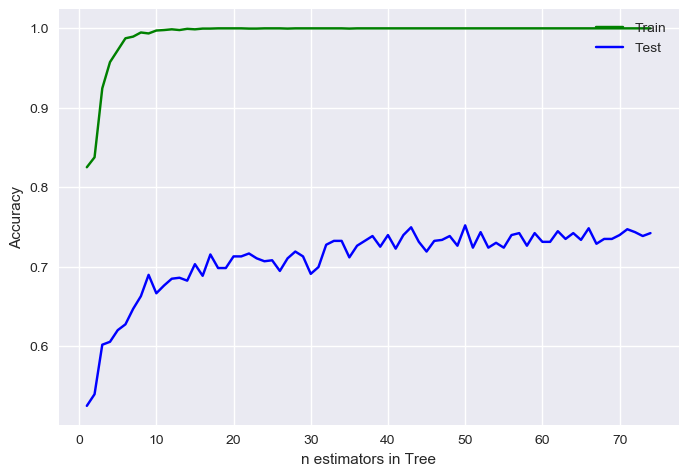

In [28]:
train_score = []
test_score = []

for depth in range(1, 75):
    rf2 = RandomForestClassifier(n_estimators=depth)
    rf2.fit(X_train, y_train)
    train_score.append(rf2.score(X_train, y_train))
    test_score.append(rf2.score(X_test, y_test))
    
plt.figure(dpi=100)
plt.plot(range(1, 75), train_score, 'g', label="Train")
plt.plot(range(1, 75), test_score, 'b', label="Test")
plt.legend(loc='upper right')
plt.xlabel("n estimators in Tree")
plt.ylabel("Accuracy");

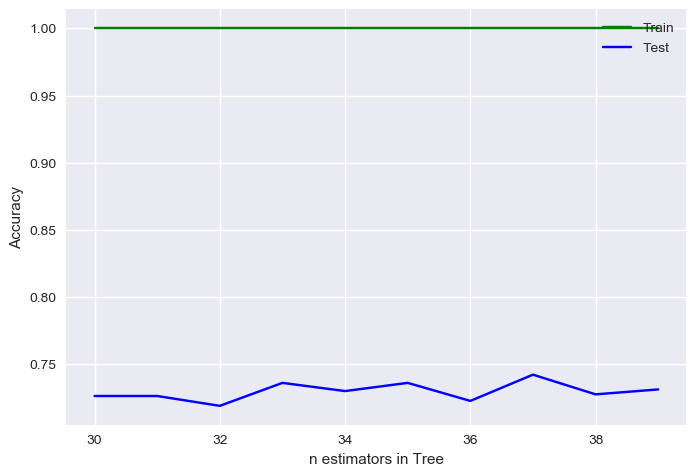

In [37]:
train_score = []
test_score = []

for depth in range(30, 40):
    rf2 = RandomForestClassifier(n_estimators=50, max_depth=depth)
    rf2.fit(X_train, y_train)
    train_score.append(rf2.score(X_train, y_train))
    test_score.append(rf2.score(X_test, y_test))
    
plt.figure(dpi=100)
plt.plot(range(30, 40), train_score, 'g', label="Train")
plt.plot(range(30, 40), test_score, 'b', label="Test")
plt.legend(loc='upper right')
plt.xlabel("n estimators in Tree")
plt.ylabel("Accuracy");

In [ ]:
train_score = []
test_score = []

for depth in range(1, 50):
    rf2 = RandomForestClassifier(max_depth=depth)
    rf2.fit(X_train, y_train)
    train_score.append(rf2.score(X_train, y_train))
    test_score.append(rf2.score(X_test, y_test))
    
plt.figure(dpi=100)
plt.plot(range(1, 50), train_score, 'g', label="Train")
plt.plot(range(1, 50), test_score, 'b', label="Test")
plt.legend(loc='upper right')
plt.xlabel("n estimators in Tree")
plt.ylabel("Accuracy");

In [32]:
X = X.reshape(-1, 1)
cross_val_score(dt, X, y, cv=10, scoring='accuracy')

/Users/NickThomas/Desktop/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


array([0.59903382, 0.55205811, 0.5776699 , 0.58252427, 0.61893204,
       0.61764706, 0.61764706, 0.55555556, 0.53712871, 0.57673267])

In [ ]:
with open('rf2.pkl', 'wb') as picklefile:
        pickle.dump(rf2, picklefile)

In [51]:
dt = DecisionTreeClassifier(max_depth=25)
dt.fit(X_train, y_train)
print(dt.score(X_test, y_test))
print(dt.score(X_train, y_train))

0.6214896214896215
0.7011915673693859


In [54]:
with open('dt.pkl', 'wb') as picklefile:
        pickle.dump(dt, picklefile)

In [52]:
bc = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=50)
bc.fit(X_train, y_train)
print(bc.score(X_test, y_test))
print(bc.score(X_train, y_train))

0.6227106227106227
0.7008860372746716


In [44]:
with open('bc.pkl', 'wb') as picklefile:
        pickle.dump(bc, picklefile)

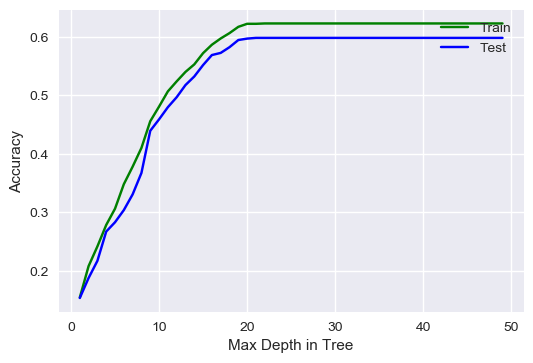

In [80]:
train_score = []
test_score = []

for depth in range(1, 50):
    dt = DecisionTreeClassifier(max_depth=depth)
    dt.fit(X_train, y_train)
    train_score.append(dt.score(X_train, y_train))
    test_score.append(dt.score(X_test, y_test))
    
plt.figure(dpi=100)
plt.plot(range(1, 50), train_score, 'g', label="Train")
plt.plot(range(1, 50), test_score, 'b', label="Test")
plt.legend(loc='upper right')
plt.xlabel("Max Depth in Tree")
plt.ylabel("Accuracy");

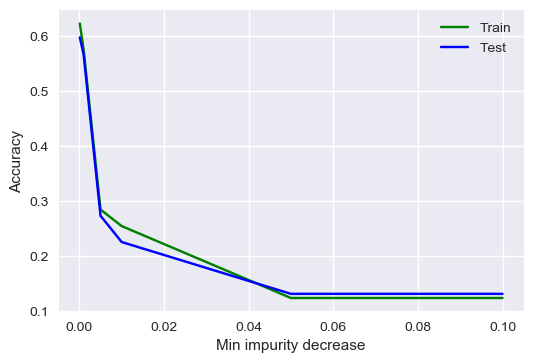

In [81]:
train_score = []
test_score = []
impurity_decrease = [.1, .05, .01, .005, .001, .0001, .0001]
for purity in impurity_decrease:
    dt = DecisionTreeClassifier(max_depth=20, min_impurity_decrease=purity)
    dt.fit(X_train, y_train)
    train_score.append(dt.score(X_train, y_train))
    test_score.append(dt.score(X_test, y_test))
    
plt.figure(dpi=100)
plt.plot(impurity_decrease, train_score, 'g', label="Train")
plt.plot(impurity_decrease, test_score, 'b', label="Test")
plt.legend(loc='upper right')
plt.xlabel("Min impurity decrease")
plt.ylabel("Accuracy");

/Users/NickThomas/Desktop/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/NickThomas/Desktop/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/NickThomas/Desktop/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/NickThomas/Desktop/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_imp

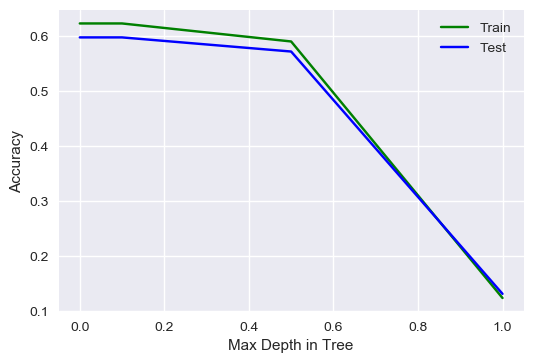

In [82]:
train_score = []
test_score = []
impurity_split = [1, .5, .1, .05, .01, .005, .001, .0001, .0001]
for purity in impurity_split:
    dt = DecisionTreeClassifier(max_depth=20, min_impurity_split=purity)
    dt.fit(X_train, y_train)
    train_score.append(dt.score(X_train, y_train))
    test_score.append(dt.score(X_test, y_test))
    
plt.figure(dpi=100)
plt.plot(impurity_split, train_score, 'g', label="Train")
plt.plot(impurity_split, test_score, 'b', label="Test")
plt.legend(loc='upper right')
plt.xlabel("Max Depth in Tree")
plt.ylabel("Accuracy");

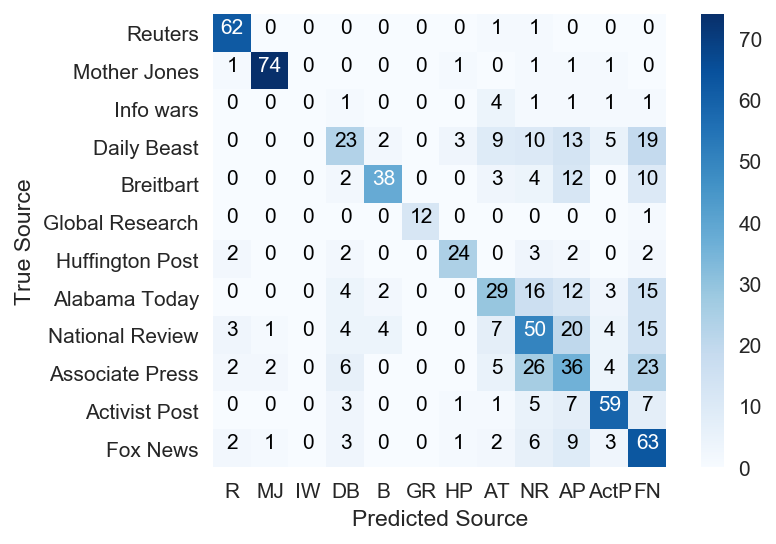

In [28]:
names = ['Reuters', 'Mother Jones', 'Info wars', 'Daily Beast', 'Breitbart',
       'Global Research', 'Huffington Post', 'Alabama Today',
       'National Review', 'Associate Press', 'Activist Post', 'Fox News']
plt.figure(dpi=150)
cm = confusion_matrix(y_test, dt.predict(X_test))
plt.imshow(cm, cmap=plt.cm.Blues)
plt.grid(False)
plt.colorbar();
plt.xticks([0,1,2,3,4,5,6, 7, 8, 9, 10, 11], ('R', 'MJ', 'IW', 'DB', 'B',
       'GR', 'HP', 'AT',
       'NR', 'AP', 'ActP', 'FN'))
plt.yticks([0,1,2,3,4,5,6, 7, 8, 9, 10, 11], ('Reuters', 'Mother Jones', 'Info wars', 'Daily Beast', 'Breitbart',
       'Global Research', 'Huffington Post', 'Alabama Today',
       'National Review', 'Associate Press', 'Activist Post', 'Fox News'));
plt.ylabel("True Source")
plt.xlabel("Predicted Source");
fmt = '.1f'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j]),#, fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

In [45]:
with open('cm.pkl', 'wb') as picklefile:
        pickle.dump(cm, picklefile)

In [29]:
X = X.reshape(-1, 1)
cross_val_score(dt, X, y, cv=10, scoring='accuracy')

array([0.65942029, 0.62227603, 0.6407767 , 0.65776699, 0.66019417,
       0.67647059, 0.64215686, 0.60246914, 0.65346535, 0.61881188])

In [29]:
print("Random Forest classification report\n",classification_report(y_test, rf2.predict(X_test)))
print("Bagging Classifier classification report\n",classification_report(y_test, bc.predict(X_test)))
print("Decision Tree classification report\n", classification_report(y_test, dt.predict(X_test)))

Random Forest classification report
                  precision    recall  f1-score   support

  Activist Post       0.94      0.94      0.94        64
  Alabama Today       0.99      0.92      0.95        79
Associate Press       0.00      0.00      0.00         9
      Breitbart       0.48      0.27      0.35        84
    Daily Beast       0.83      0.55      0.66        69
       Fox News       1.00      0.92      0.96        13
Global Research       0.80      0.69      0.74        35
Huffington Post       0.55      0.36      0.43        81
      Info wars       0.35      0.49      0.41       108
   Mother Jones       0.31      0.39      0.35       104
National Review       0.72      0.71      0.72        83
        Reuters       0.48      0.69      0.57        90

    avg / total       0.60      0.58      0.58       819

Bagging Classifier classification report
                  precision    recall  f1-score   support

  Activist Post       0.86      0.97      0.91        64
  Ala

/Users/NickThomas/Desktop/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [ ]:
for x in range(50):
    dt = DecisionTreeClassifier(max_depth=25)
    dt.fit(X_train, y_train)
    print(dt.score(X_test, y_test))
    print(dt.score(X_train, y_train))

In [70]:
dt.get_params()

{'class_weight': None,
 'criterion': 'gini',
 'max_depth': 20,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': None,
 'splitter': 'best'}

In [150]:
with open('dt.pkl', 'wb') as picklefile:
        pickle.dump(dt, picklefile)

In [83]:
from sklearn.tree import export_graphviz

export_graphviz(dt, out_file="tree.dot") 

In [113]:
dt.predict(78)
    

array(['Reuters'], dtype=object)

In [ ]:
len(check)

In [30]:
X = X.reshape(-1, 1)
cross_val_score(bc, X, y, cv=10, scoring='accuracy')

array([0.66183575, 0.62469734, 0.63834951, 0.66990291, 0.65776699,
       0.67156863, 0.64215686, 0.60987654, 0.65594059, 0.62128713])

In [59]:
with open('bc.pkl', 'wb') as picklefile:
        pickle.dump(bc, picklefile)

In [67]:
from sklearn import naive_bayes
from sklearn.metrics import accuracy_score, classification_report

model = naive_bayes.GaussianNB()
model.fit(X_train, y_train)

print("Accuracy: %.3f"% accuracy_score(y_test, model.predict(X_test)))
print(classification_report(y_test, model.predict(X_test)))

Accuracy: 0.249
                 precision    recall  f1-score   support

  Activist Post       0.23      0.74      0.34        95
  Alabama Today       0.24      0.89      0.38        62
Associate Press       0.00      0.00      0.00         1
      Breitbart       0.00      0.00      0.00        63
    Daily Beast       0.00      0.00      0.00        75
       Fox News       0.00      0.00      0.00        25
Global Research       0.00      0.00      0.00        37
Huffington Post       0.00      0.00      0.00        74
      Info wars       0.53      0.40      0.46       100
   Mother Jones       0.00      0.00      0.00        85
National Review       0.58      0.11      0.19        98
        Reuters       0.18      0.27      0.21       104

    avg / total       0.20      0.25      0.17       819



/Users/NickThomas/Desktop/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [68]:
model = naive_bayes.BernoulliNB()
model.fit(X_train, y_train)

print("Accuracy: %.3f"% accuracy_score(y_test, model.predict(X_test)))
print(classification_report(y_test, model.predict(X_test)))


Accuracy: 0.133
                 precision    recall  f1-score   support

  Activist Post       0.00      0.00      0.00        95
  Alabama Today       0.00      0.00      0.00        62
Associate Press       0.00      0.00      0.00         1
      Breitbart       0.00      0.00      0.00        63
    Daily Beast       0.00      0.00      0.00        75
       Fox News       0.00      0.00      0.00        25
Global Research       0.00      0.00      0.00        37
Huffington Post       0.00      0.00      0.00        74
      Info wars       0.38      0.06      0.10       100
   Mother Jones       0.00      0.00      0.00        85
National Review       0.00      0.00      0.00        98
        Reuters       0.13      0.99      0.23       104

    avg / total       0.06      0.13      0.04       819



/Users/NickThomas/Desktop/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [69]:
model = naive_bayes.MultinomialNB()
model.fit(X_train, y_train)

print("Accuracy: %.3f"% accuracy_score(y_test, model.predict(X_test)))
print(classification_report(y_test, model.predict(X_test)))


Accuracy: 0.122
                 precision    recall  f1-score   support

  Activist Post       0.00      0.00      0.00        95
  Alabama Today       0.00      0.00      0.00        62
Associate Press       0.00      0.00      0.00         1
      Breitbart       0.00      0.00      0.00        63
    Daily Beast       0.00      0.00      0.00        75
       Fox News       0.00      0.00      0.00        25
Global Research       0.00      0.00      0.00        37
Huffington Post       0.00      0.00      0.00        74
      Info wars       0.12      1.00      0.22       100
   Mother Jones       0.00      0.00      0.00        85
National Review       0.00      0.00      0.00        98
        Reuters       0.00      0.00      0.00       104

    avg / total       0.01      0.12      0.03       819



/Users/NickThomas/Desktop/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [71]:
from sklearn.svm import LinearSVC, SVC
from sklearn.preprocessing import scale

model = LinearSVC()
model.fit(X_train, y_train)

print("Accuracy: %.3f"% accuracy_score(y_test, model.predict(X_test)))
print(classification_report(y_test, model.predict(X_test)))



Accuracy: 0.117
                 precision    recall  f1-score   support

  Activist Post       0.00      0.00      0.00        95
  Alabama Today       0.00      0.00      0.00        62
Associate Press       0.00      0.00      0.00         1
      Breitbart       0.08      0.75      0.15        63
    Daily Beast       0.00      0.00      0.00        75
       Fox News       0.00      0.00      0.00        25
Global Research       0.00      0.00      0.00        37
Huffington Post       0.00      0.00      0.00        74
      Info wars       0.19      0.49      0.28       100
   Mother Jones       0.00      0.00      0.00        85
National Review       0.00      0.00      0.00        98
        Reuters       0.00      0.00      0.00       104

    avg / total       0.03      0.12      0.05       819



/Users/NickThomas/Desktop/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [72]:
model = SVC()
model.fit(X_train, y_train)

print("Accuracy: %.3f"% accuracy_score(y_test, model.predict(X_test)))
print(classification_report(y_test, model.predict(X_test)))

Accuracy: 0.596
                 precision    recall  f1-score   support

  Activist Post       0.86      0.95      0.90        95
  Alabama Today       0.90      0.92      0.91        62
Associate Press       0.00      0.00      0.00         1
      Breitbart       0.57      0.21      0.30        63
    Daily Beast       1.00      0.51      0.67        75
       Fox News       1.00      0.96      0.98        25
Global Research       0.68      0.68      0.68        37
Huffington Post       0.51      0.45      0.47        74
      Info wars       0.58      0.46      0.51       100
   Mother Jones       0.26      0.59      0.36        85
National Review       0.84      0.60      0.70        98
        Reuters       0.43      0.51      0.47       104

    avg / total       0.66      0.60      0.61       819



/Users/NickThomas/Desktop/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [48]:
knn = KNeighborsClassifier(n_jobs= -1, n_neighbors=14)
knn.fit(X_train, y_train) 
## And score it on your testing data.
knn.score(X_test, y_test)

0.5616605616605617

In [49]:
with open('knn.pkl', 'wb') as picklefile:
        pickle.dump(knn, picklefile)

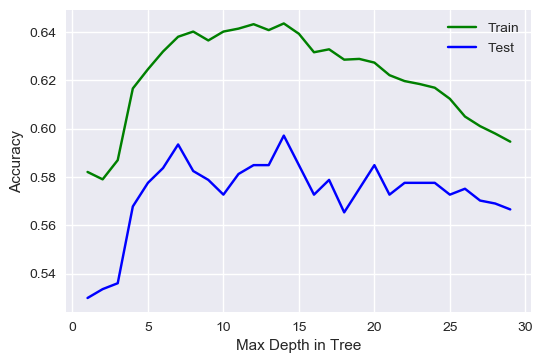

In [46]:
train_score = []
test_score = []

for neighbors in range(1, 30):
    knn = KNeighborsClassifier(n_jobs= -1, n_neighbors=neighbors)
    knn.fit(X_train, y_train)
    train_score.append(knn.score(X_train, y_train))
    test_score.append(knn.score(X_test, y_test))
    
plt.figure(dpi=100)
plt.plot(range(1, 30), train_score, 'g', label="Train")
plt.plot(range(1, 30), test_score, 'b', label="Test")
plt.legend(loc='upper right')
plt.xlabel("Max Depth in Tree")
plt.ylabel("Accuracy");

In [71]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': 1,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [47]:
print("Accuracy: %.3f"% accuracy_score(y_test, knn.predict(X_test)))
print(classification_report(y_test, knn.predict(X_test)))

Accuracy: 0.567
                 precision    recall  f1-score   support

  Activist Post       0.88      0.88      0.88        64
  Alabama Today       0.79      0.82      0.81        79
Associate Press       0.00      0.00      0.00         9
      Breitbart       0.53      0.25      0.34        84
    Daily Beast       0.73      0.55      0.63        69
       Fox News       0.92      0.92      0.92        13
Global Research       0.49      0.57      0.53        35
Huffington Post       0.51      0.30      0.37        81
      Info wars       0.59      0.58      0.59       108
   Mother Jones       0.36      0.44      0.40       104
National Review       0.59      0.72      0.65        83
        Reuters       0.41      0.66      0.50        90

    avg / total       0.57      0.57      0.56       819



/Users/NickThomas/Desktop/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [ ]:
os.system('say "Your move.....Commander"')

In [149]:
dt.predict(6)

array(['Mother Jones'], dtype=object)